In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [46]:
# reading dataset
df = pd.read_csv('Data Analyst Test Task Data - Task 3.csv')


In [3]:
df

,install_date,country_code,media_source,spend_usd,subscribers,erevenue_12month_usd
0,2020-12-28,AD,ms_1,0.070004,0,0.000000
1,2020-12-28,AE,ms_1,33.681845,1,27.993000
2,2020-12-28,AE,ms_2,10.449999,1,6.747060
3,2020-12-28,AF,ms_1,1.460100,0,0.000000
4,2020-12-28,AG,ms_1,0.190010,0,0.000000
...,...,...,...,...,...,...
1759,2021-01-03,YE,ms_1,0.010000,0,0.000000
1760,2021-01-03,YT,ms_1,0.270000,0,0.000000
1761,2021-01-03,ZA,ms_1,43.130000,3,35.019863
1762,2021-01-03,ZM,ms_1,0.809999,0,0.000000


In [30]:
 df['country_code'].unique()

array(['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AR', 'AS', 'AT', 'AU',
       'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ',
       'BM', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BZ', 'CA', 'CD', 'CF',
       'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CV', 'CW',
       'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG',
       'ES', 'ET', 'FI', 'FJ', 'FK', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD',
       'GE', 'GF', 'GG', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR',
       'GT', 'GU', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE',
       'IL', 'IM', 'IN', 'IQ', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE',
       'KG', 'KH', 'KN', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI',
       'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME',
       'MF', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR',
       'MS', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', nan, 'NC', 'NE',
       'NF', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NU

In [4]:
#stats of dataset for every row
total_values = df.shape[0]
null_values = df.isna().sum() + df.isin(['']).sum()
incorrect_values = df.isin([' ', ',','.','\\','/','|',';','\'','"']).sum()
unique_values = df.nunique()
 
data = {
    'Rows': total_values,
    'Filled values': total_values - null_values,
    'Unique values': unique_values,
    'Unique values, %': unique_values *100 / total_values,
    'Unique values (for filled), %': unique_values *100 / (total_values-null_values),
    'Null': null_values,
    'Null, %': null_values *100/ total_values,
    'Incorrect': incorrect_values,
    'Incorrect, %': incorrect_values *100 / total_values
 
}
summary_df = pd.DataFrame(data)

summary_df.style.background_gradient(cmap='coolwarm', subset=['Null, %', 'Unique values (for filled), %'])


,Rows,Filled values,Unique values,"Unique values, %","Unique values (for filled), %",Null,"Null, %",Incorrect,"Incorrect, %"
install_date,1764,1764,7,0.396825,0.396825,0,0.000000,0,0.000000
country_code,1764,1757,226,12.811791,12.862834,7,0.396825,0,0.000000
media_source,1764,1764,3,0.170068,0.170068,0,0.000000,0,0.000000
spend_usd,1764,1764,1195,67.743764,67.743764,0,0.000000,0,0.000000
subscribers,1764,1764,58,3.287982,3.287982,0,0.000000,0,0.000000
erevenue_12month_usd,1764,1764,295,16.723356,16.723356,0,0.000000,0,0.000000


In [47]:
#cleaning rows where we dont have info about spend_usd but have info about users or revenue
df = df[~(((df['subscribers'] > 0) | (df['erevenue_12month_usd'] > 0)) & (df['spend_usd'] == 0))]
df

,install_date,country_code,media_source,spend_usd,subscribers,erevenue_12month_usd
0,2020-12-28,AD,ms_1,0.070004,0,0.000000
1,2020-12-28,AE,ms_1,33.681845,1,27.993000
2,2020-12-28,AE,ms_2,10.449999,1,6.747060
3,2020-12-28,AF,ms_1,1.460100,0,0.000000
4,2020-12-28,AG,ms_1,0.190010,0,0.000000
...,...,...,...,...,...,...
1759,2021-01-03,YE,ms_1,0.010000,0,0.000000
1760,2021-01-03,YT,ms_1,0.270000,0,0.000000
1761,2021-01-03,ZA,ms_1,43.130000,3,35.019863
1762,2021-01-03,ZM,ms_1,0.809999,0,0.000000


In [49]:
# adding calculation of ROMI
df['ROMI'] = ((df['erevenue_12month_usd'] - df['spend_usd'])/df['spend_usd']) * 100
df['ROMI'] = df['ROMI'].round(2)

df

,install_date,country_code,media_source,spend_usd,subscribers,erevenue_12month_usd,ROMI
0,2020-12-28,AD,ms_1,0.070004,0,0.000000,-100.00
1,2020-12-28,AE,ms_1,33.681845,1,27.993000,-16.89
2,2020-12-28,AE,ms_2,10.449999,1,6.747060,-35.43
3,2020-12-28,AF,ms_1,1.460100,0,0.000000,-100.00
4,2020-12-28,AG,ms_1,0.190010,0,0.000000,-100.00
...,...,...,...,...,...,...,...
1759,2021-01-03,YE,ms_1,0.010000,0,0.000000,-100.00
1760,2021-01-03,YT,ms_1,0.270000,0,0.000000,-100.00
1761,2021-01-03,ZA,ms_1,43.130000,3,35.019863,-18.80
1762,2021-01-03,ZM,ms_1,0.809999,0,0.000000,-100.00


### Counting ROMI

In [66]:
grouped = df.groupby(['media_source', 'country_code']).agg({
    'spend_usd': 'sum',
    'subscribers': 'sum',
    'erevenue_12month_usd': 'sum',
    'ROMI': 'mean'
}).reset_index()
grouped

,media_source,country_code,spend_usd,subscribers,erevenue_12month_usd,ROMI
0,ms_1,AD,1.069968,0,0.000000,-100.000000
1,ms_1,AE,355.223417,21,288.233401,-11.180000
2,ms_1,AF,8.699837,0,0.000000,-100.000000
3,ms_1,AG,1.039974,1,10.493000,1399.000000
4,ms_1,AL,7.499836,1,10.493000,82.804286
...,...,...,...,...,...,...
267,ms_2,UY,1.018410,0,0.000000,-100.000000
268,ms_2,ZA,0.362843,0,0.000000,-100.000000
269,ms_3,AU,139.300000,12,92.250375,-50.740000
270,ms_3,CA,406.590000,19,1.924540,-99.550000


In [67]:
media_source_summary = df.groupby('media_source').agg({
    'ROMI': 'mean'  # Використовуємо середній ROMI для кожного джерела
}).reset_index()

media_source_summary

,media_source,ROMI
0,ms_1,48.524392
1,ms_2,301.993780
2,ms_3,-48.628889


### The highest average ROMI - for media source 2, the lowest - for media source 3


/var/folders/nj/fs0pcgz961bgvz9tj74rxlhc0000gn/T/ipykernel_49040/2897233894.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_countries = average_romi.groupby('media_source').apply(lambda x: x.nlargest(10, 'ROMI')).reset_index(drop=True)


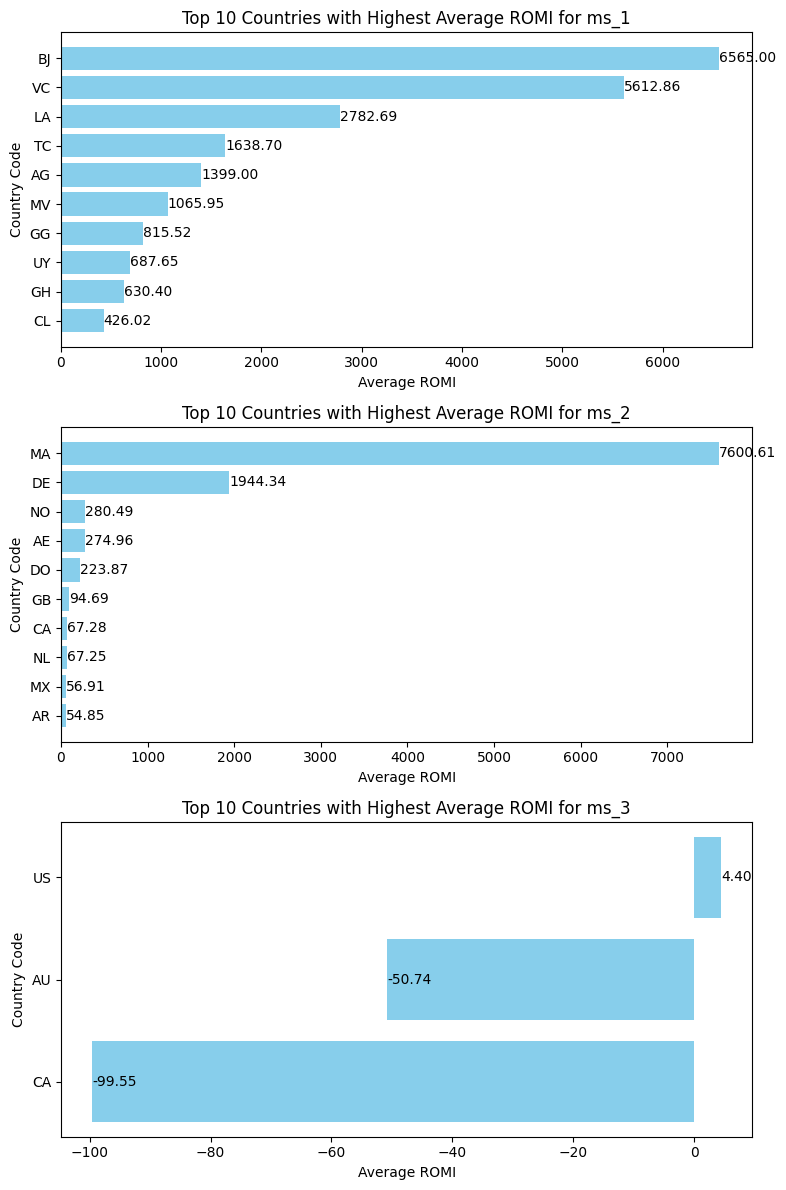

In [89]:
average_romi = df.groupby(['media_source', 'country_code']).agg({'ROMI': 'mean'}).reset_index()

# Top 10 countries with highest average ROMI for each media source
top_10_countries = average_romi.groupby('media_source').apply(lambda x: x.nlargest(10, 'ROMI')).reset_index(drop=True)

media_sources = top_10_countries['media_source'].unique()

fig, axes = plt.subplots(nrows=len(media_sources), ncols=1, figsize=(8, 4 * len(media_sources)))

for ax, media_source in zip(axes, media_sources):
    data = top_10_countries[top_10_countries['media_source'] == media_source]
    bars = ax.barh(data['country_code'], data['ROMI'], color='skyblue')
    ax.set_title(f'Top 10 Countries with Highest Average ROMI for {media_source}')
    ax.set_xlabel('Average ROMI')
    ax.set_ylabel('Country Code')
    ax.invert_yaxis()

    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                f'{bar.get_width():.2f}', 
                va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

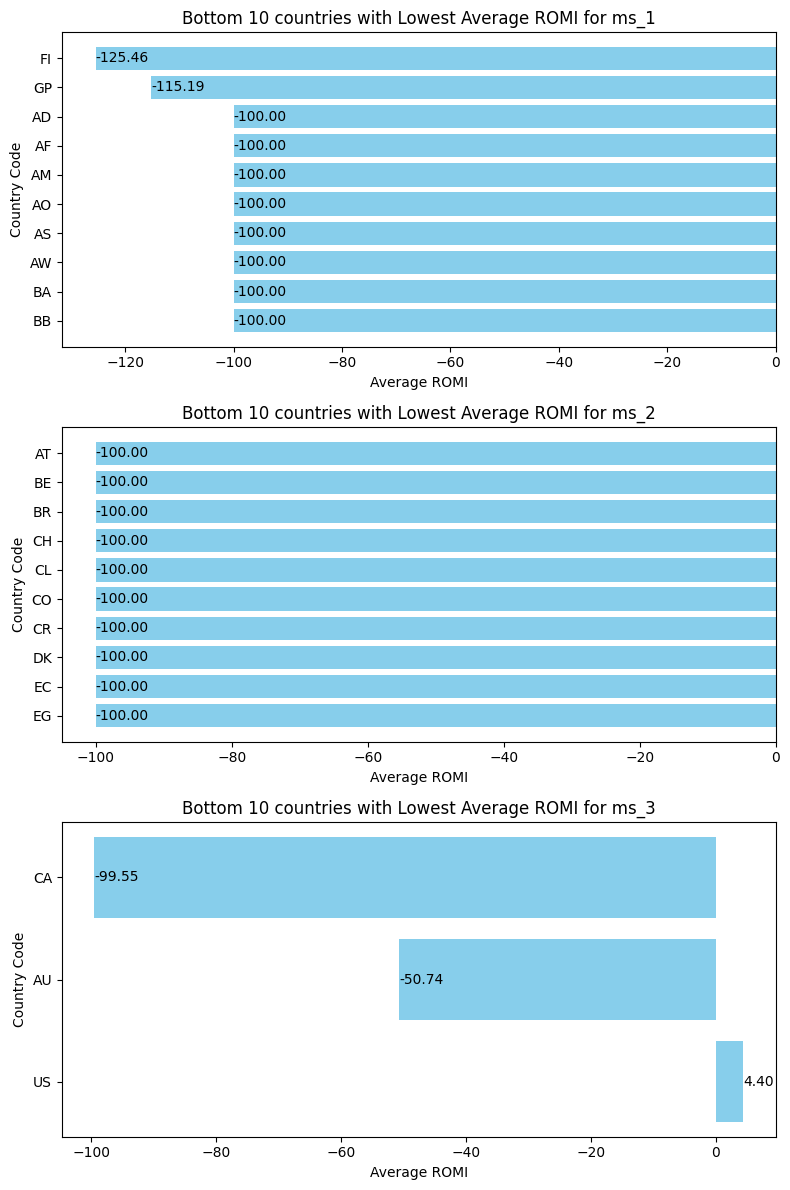

In [91]:
media_sources = bottom_10_countries['media_source'].unique()

fig, axes = plt.subplots(nrows=len(media_sources), ncols=1, figsize=(8, 4 * len(media_sources)))

for ax, media_source in zip(axes, media_sources):
    data = bottom_10_countries[bottom_10_countries['media_source'] == media_source]
    bars = ax.barh(data['country_code'], data['ROMI'], color='skyblue')
    ax.set_title(f'Bottom 10 countries with Lowest Average ROMI for {media_source}')
    ax.set_xlabel('Average ROMI')
    ax.set_ylabel('Country Code')
    ax.invert_yaxis()

    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                f'{bar.get_width():.2f}', 
                va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Since average ROMI for media_source_3 is negative, and only for the US is the average ROMI for every day in media_source_3 greater than 0, but it is still very low, the first conclusion is that we can stop acquiring traffic for this source



In [58]:
#Output separate data where romi is negative and positive
negative_romi_df = df[df['ROMI'] < 0]

df_media_source_1_neg = negative_romi_df[negative_romi_df['media_source'] == 'ms_1']
df_media_source_2_neg = negative_romi_df[negative_romi_df['media_source'] == 'ms_2']
df_media_source_3_neg = negative_romi_df[negative_romi_df['media_source'] == 'ms_3']


positive_romi_df = df[df['ROMI'] > 0]

df_media_source_1_pos = positive_romi_df[positive_romi_df['media_source'] == 'ms_1']
df_media_source_2_pos = positive_romi_df[positive_romi_df['media_source'] == 'ms_2']
df_media_source_3_pos = positive_romi_df[positive_romi_df['media_source'] == 'ms_3']

In [81]:
# More detailed information about media_source_3
df_media_source_3_pos

,install_date,country_code,media_source,spend_usd,subscribers,erevenue_12month_usd,ROMI
1246,2021-01-01,US,ms_3,650.06,57,828.4710,27.45
1747,2021-01-03,US,ms_3,376.84,41,401.7705,6.62


In [82]:
df_media_source_3_neg

,install_date,country_code,media_source,spend_usd,subscribers,erevenue_12month_usd,ROMI
1024,2021-01-01,AU,ms_3,67.78,5,63.523877,-6.28
1049,2021-01-01,CA,ms_3,171.52,6,0.000000,-100.00
1277,2021-01-02,AU,ms_3,53.14,6,28.726497,-45.94
1301,2021-01-02,CA,ms_3,142.72,11,1.924540,-98.65
1491,2021-01-02,US,ms_3,603.92,58,477.932000,-20.86
1523,2021-01-03,AU,ms_3,18.38,1,0.000000,-100.00
1548,2021-01-03,CA,ms_3,92.35,2,0.000000,-100.00


#### Since we have only positive ROMI for US for media_source_3, that on average outputs only 4.4%, we can turn off traffic for this source

## More analysis for media_source_1 and media_source_2

#### We can keep countries for media_source_1 and  media_source_2, where average ROMI for all the days is higher than some percent, for example - more than 100

In [106]:
average_romi = df.groupby(['media_source', 'country_code']).agg({'ROMI': 'mean'}).reset_index()

# Filter for media source 1 and 2 with positive average ROMI
positive_romi_media_source_1 = average_romi[(average_romi['media_source'] == 'ms_1') & (average_romi['ROMI'] > 100)]
positive_romi_media_source_2 = average_romi[(average_romi['media_source'] == 'ms_2') & (average_romi['ROMI'] > 100)]


In [107]:
positive_romi_media_source_1

,media_source,country_code,ROMI
3,ms_1,AG,1399.000000
12,ms_1,AZ,117.245714
18,ms_1,BG,124.324286
21,ms_1,BJ,6565.000000
23,ms_1,BM,175.775714
37,ms_1,CI,420.261429
39,ms_1,CL,426.024286
70,ms_1,GG,815.521429
71,ms_1,GH,630.395714
84,ms_1,HN,366.165714


In [109]:
countries_ms_1 = positive_romi_media_source_1['country_code'].unique()
countries_ms_1

array(['AG', 'AZ', 'BG', 'BJ', 'BM', 'CI', 'CL', 'GG', 'GH', 'HN', 'IT',
       'LA', 'LT', 'MV', 'NG', 'PY', 'QA', 'SG', 'SK', 'TC', 'TZ', 'UA',
       'UG', 'UY', 'VC'], dtype=object)

In [101]:
positive_romi_media_source_2

,media_source,country_code,ROMI
226,ms_2,AE,274.955714
237,ms_2,DE,1944.337143
239,ms_2,DO,223.871429
248,ms_2,MA,7600.608571
252,ms_2,NO,280.490000


In [110]:
countries_ms_2 = positive_romi_media_source_2['country_code'].unique()
countries_ms_2

array(['AE', 'DE', 'DO', 'MA', 'NO'], dtype=object)

#### We want to keep countries from media_source_1 and media_source_2, where average ROMI for all the days is bigger than 100%, for media_source_1 it is :
#### 'AG', 'AZ', 'BG', 'BJ', 'BM', 'CI', 'CL', 'GG', 'GH', 'HN', 'IT','LA', 'LT', 'MV', 'NG', 'PY', 'QA', 'SG', 'SK', 'TC', 'TZ', 'UA','UG', 'UY', 'VC'
#### For media_source_2 : 'AE', 'DE', 'DO', 'MA', 'NO'

### For the countries where average ROMI is lower than 100, we want to see if it's higher on certian days

In [111]:
# filter dataframe for every media source and exclude countries that we decided to keep
df_media_source_1 = df[(df['media_source'] == 'ms_1') & (~df['country_code'].isin(countries_ms_1))]

df_media_source_2 = df[(df['media_source'] == 'ms_2') & (~df['country_code'].isin(countries_ms_2))]

# group by date and country, calculate the average ROMI
grouped_df_ms_1 = df_media_source_1.groupby(['install_date', 'country_code'])['ROMI'].mean().reset_index()
grouped_df_ms_2 = df_media_source_2.groupby(['install_date', 'country_code'])['ROMI'].mean().reset_index()

# filter countries where ROMI > 100%
grouped_df_ms_1_pos = grouped_df_ms_1[grouped_df_ms_1['ROMI'] > 100]
grouped_df_ms_2_pos = grouped_df_ms_2[grouped_df_ms_2['ROMI'] > 100]

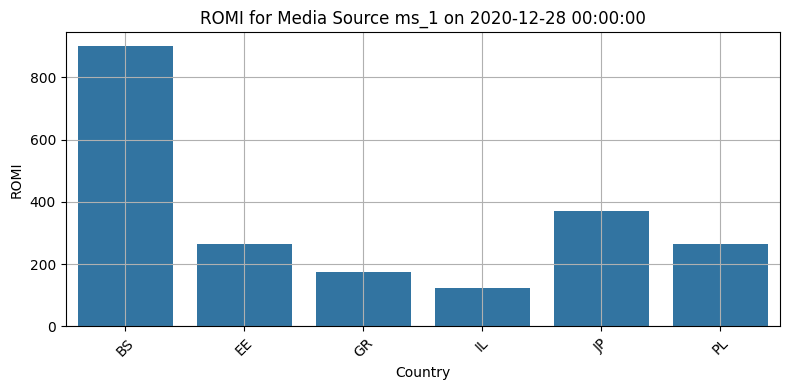

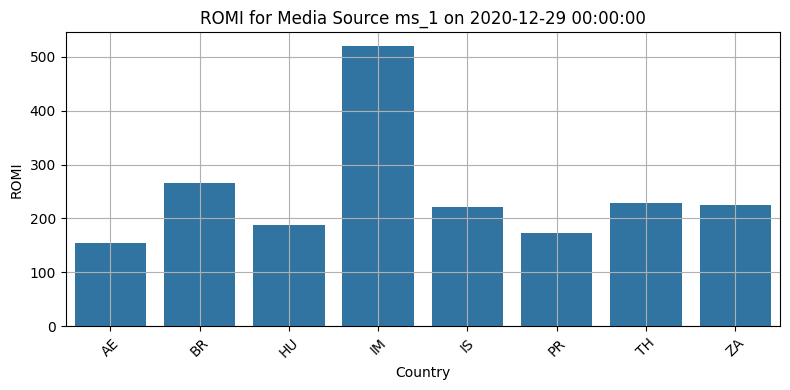

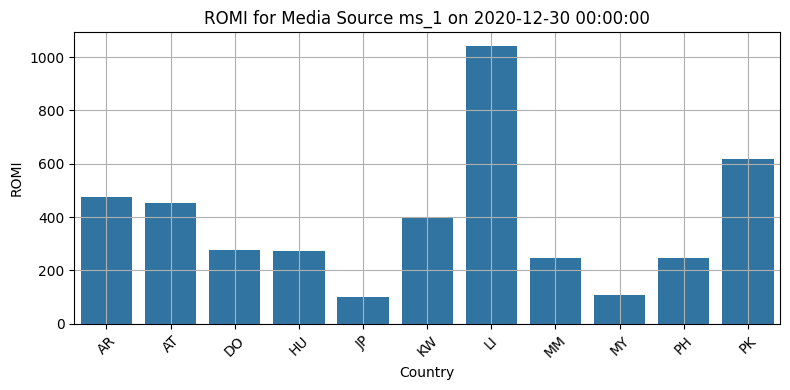

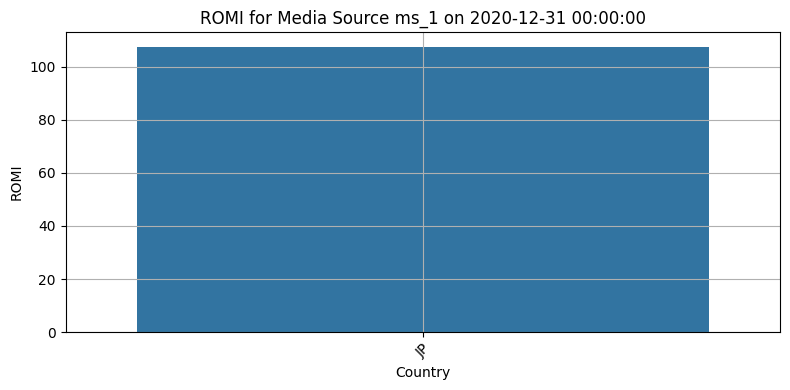

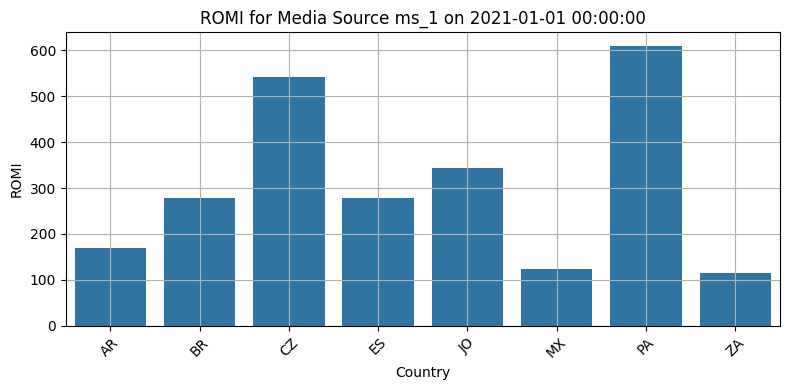

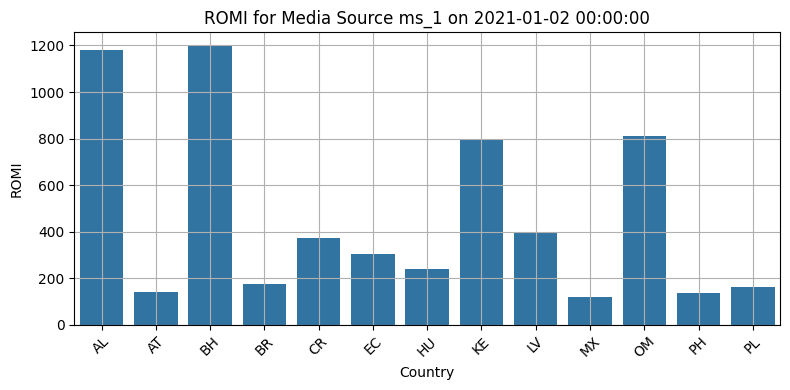

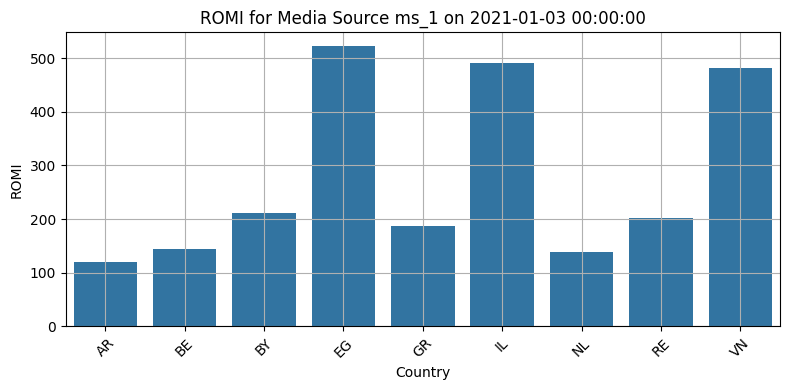

In [113]:

# plotting for Media Source 1
dates_ms_1 = grouped_df_ms_1_pos['install_date'].unique()

for date in dates_ms_1:
    plt.figure(figsize=(8, 4))  # Set figure size
    date_data_ms_1 = grouped_df_ms_1_pos[grouped_df_ms_1_pos['install_date'] == date]

    sns.barplot(x='country_code', y='ROMI', data=date_data_ms_1)
    
    plt.title(f'ROMI for Media Source ms_1 on {date}')
    plt.xlabel('Country')
    plt.ylabel('ROMI')
    plt.xticks(rotation=45)
    plt.grid()

    plt.tight_layout()
    plt.show()


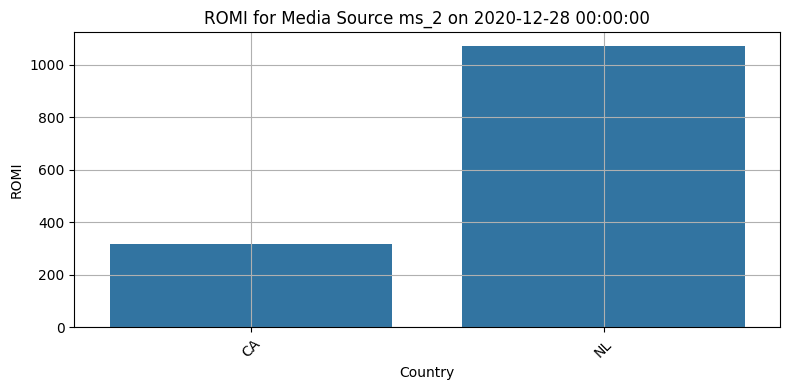

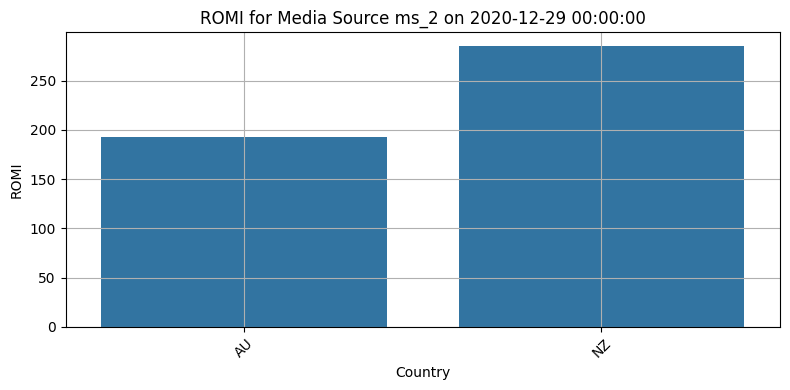

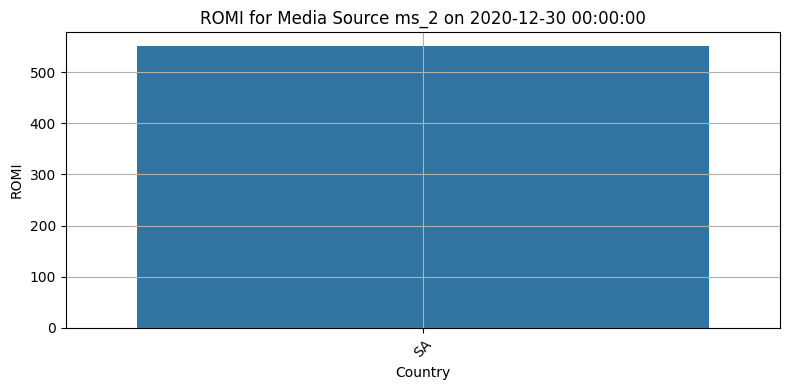

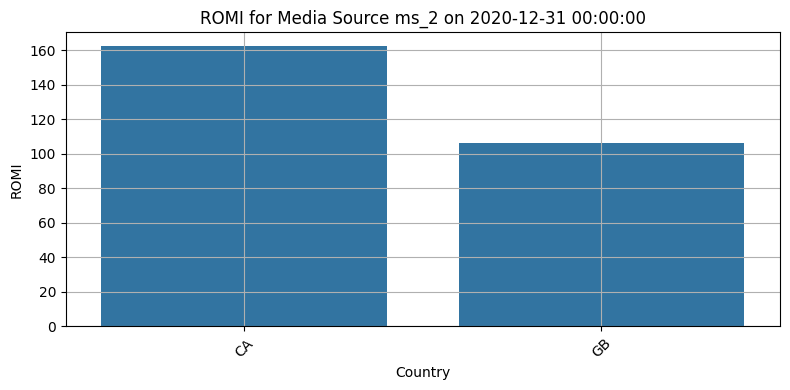

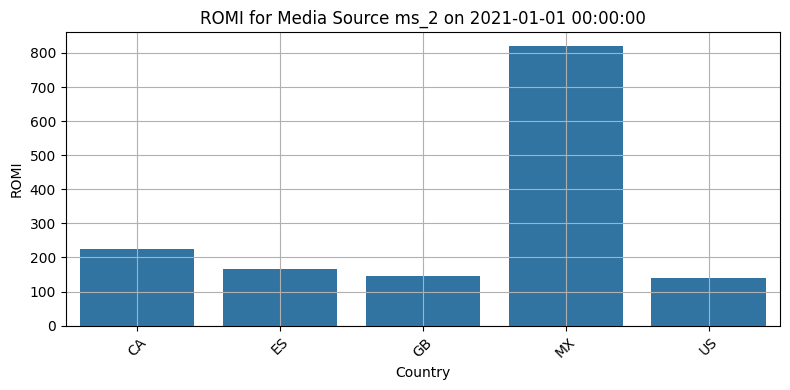

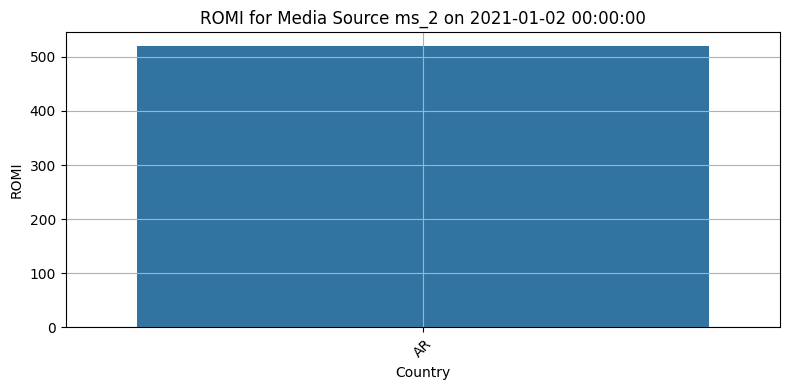

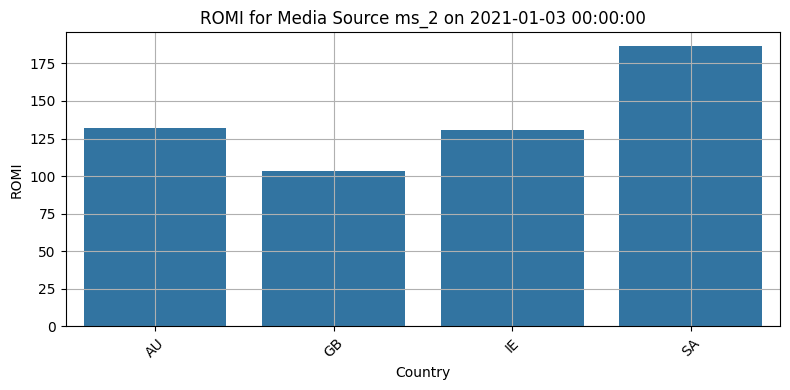

In [115]:
# plotting  Media Source 2
dates_ms_2 = grouped_df_ms_2_pos['install_date'].unique()

for date in dates_ms_2:
    plt.figure(figsize=(8, 4))
    date_data_ms_2 = grouped_df_ms_2_pos[grouped_df_ms_2_pos['install_date'] == date]

    sns.barplot(x='country_code', y='ROMI', data=date_data_ms_2)
    
    plt.title(f'ROMI for Media Source ms_2 on {date}')
    plt.xlabel('Country')
    plt.ylabel('ROMI')
    plt.xticks(rotation=45)
    plt.grid()

    plt.tight_layout()
    plt.show()

#### From this plots, we can make conclusions about countries and days, and maybe choose to acquire more traffic for countries &  days

## Conclusions
### Its better to stop acquiring traffic for media_source_3, since ROMI for every country is very low here
### We want to keep countries from media_source_1 and media_source_2, where average ROMI for all the days is bigger than 100%, for media_source_1 it is 
#### 'AG', 'AZ', 'BG', 'BJ', 'BM', 'CI', 'CL', 'GG', 'GH', 'HN', 'IT','LA', 'LT', 'MV', 'NG', 'PY', 'QA', 'SG', 'SK', 'TC', 'TZ', 'UA','UG', 'UY', 'VC'
### For media_source_2 :
#### 'AE', 'DE', 'DO', 'MA', 'NO'
#### For rest of countries, we can plot ROMI for different days, to track for which days and countries the purchase of traffic can be most profitable